# Notebook 4 - Random Forest

In [2]:
################################## MODIFY PATHS TO RUN THE NOTEBOOK #########################################
data_folder = '/content/drive/MyDrive/final project/data/'
code_folder = '/content/drive/MyDrive/final project/code/'
##############################################################################################################

# mount drive:
from google.colab import drive
drive.mount('/content/drive')


# imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sk:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# utilities:
from copy import deepcopy
from itertools import product
import pickle
from google.colab import drive

# custom functions:
import sys
sys.path.append(code_folder)
from ml_final_project_functions import plot_predictions, grid_search

################################################################################

# data:

# unpack original data pkl - v1:
with open(data_folder + 'processed_data_v1.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v1, X_val_v1, X_test_v1  = data['X_train'], data['X_val'], data['X_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

# unpack pca pkl - v3:
with open(data_folder + 'processed_data_v3.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v3, X_val_v3, X_test_v3  = data['X_train'], data['X_val'], data['X_test']

# unpack pca pkl - v4:
with open(data_folder + 'processed_data_v4.pkl', 'rb') as f:
    data = pickle.load(f)
X_train_v4, X_val_v4, X_test_v4  = data['X_train'], data['X_val'], data['X_test']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset V3 - PCA

fitting 6 hyperparameters combinations

best mse is 31609.81
best params:
 (('n_estimators', 256), ('max_features', 10), ('max_depth', 8), ('min_samples_split', 175), ('min_samples_leaf', 175), ('bootstrap', False), ('criterion', 'squared_error'))


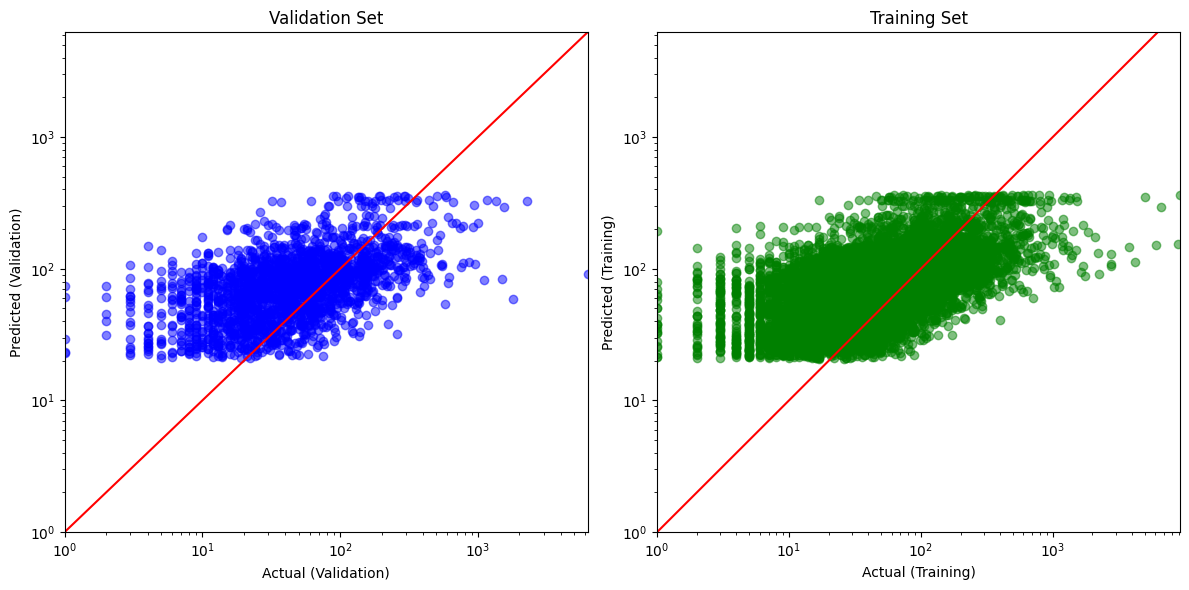

In [ ]:
rf = RandomForestRegressor(random_state=42)

# param grid:
param_grid = {'n_estimators': [256],
              'max_features': [6,7,10],
              'max_depth': [6,8],
              'min_samples_split': [175],
              'min_samples_leaf': [175],
              'bootstrap': [False],
              'criterion': ['squared_error']
              }

# run grid search:
results, best_model = grid_search(param_grid, rf, X_train_v3, y_train, X_val_v3, y_val, verbose=10)


# plot results:
y_train_pred = best_model.predict(X_train_v3)
y_val_pred = best_model.predict(X_val_v3)
plot_predictions(y_train, y_train_pred, y_val, y_val_pred)

In [ ]:
results.head(3)

,params,r2 train,mse train,r2 val,mse val
5,"((n_estimators, 256), (max_features, 10), (max...",0.094552,42856.665944,0.087250,31609.814414
4,"((n_estimators, 256), (max_features, 10), (max...",0.088947,43121.941817,0.086228,31645.203905
3,"((n_estimators, 256), (max_features, 7), (max_...",0.092065,42974.359371,0.085448,31672.214869


Dataset V4 - Kbest + PCA

fitting 6 hyperparameters combinations

best mse is 31278.21
best params:
 (('n_estimators', 200), ('max_features', 20), ('max_depth', 50), ('min_samples_split', 100), ('min_samples_leaf', 5), ('bootstrap', False), ('criterion', 'squared_error'))


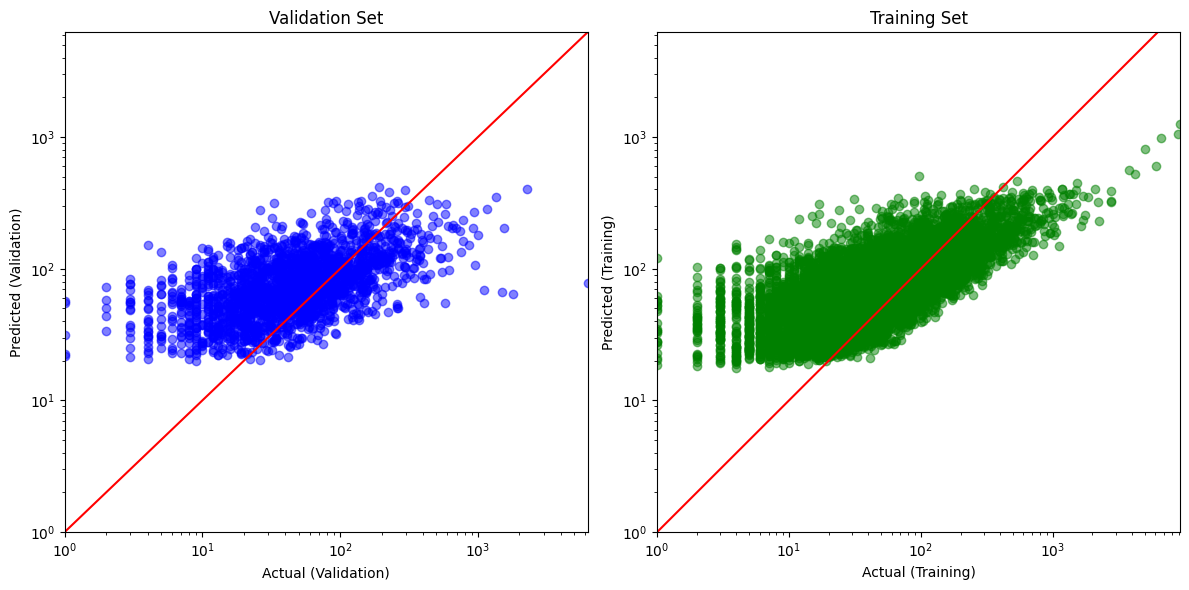

In [3]:
rf = RandomForestRegressor(random_state=42)

# param grid:
param_grid = {'n_estimators': [200],
              'max_features': [10,20],
              'max_depth': [10,25,50],
              'min_samples_split': [100],
              'min_samples_leaf': [5],
              'bootstrap': [False],
              'criterion': ['squared_error']
              }

# run grid search:
results, best_model = grid_search(param_grid, rf, X_train_v4, y_train, X_val_v4, y_val, verbose=10)


# plot results:
y_train_pred = best_model.predict(X_train_v4)
y_val_pred = best_model.predict(X_val_v4)
plot_predictions(y_train, y_train_pred, y_val, y_val_pred)

In [4]:
results.head()

,params,r2 train,mse train,r2 val,mse val
5,"((n_estimators, 200), (max_features, 20), (max...",0.274123,34357.203355,0.096825,31278.209739
4,"((n_estimators, 200), (max_features, 20), (max...",0.262692,34898.223303,0.094138,31371.288950
2,"((n_estimators, 200), (max_features, 10), (max...",0.239619,35990.326373,0.089790,31521.849463
1,"((n_estimators, 200), (max_features, 10), (max...",0.230274,36432.672586,0.086734,31627.683000
3,"((n_estimators, 200), (max_features, 20), (max...",0.217493,37037.597191,0.081925,31794.221676
